## Softmax regression


todo

- probar con el dataset de iris
- agregar los contornos de cada clase (con los niveles de cada probabilidad)

In [4]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


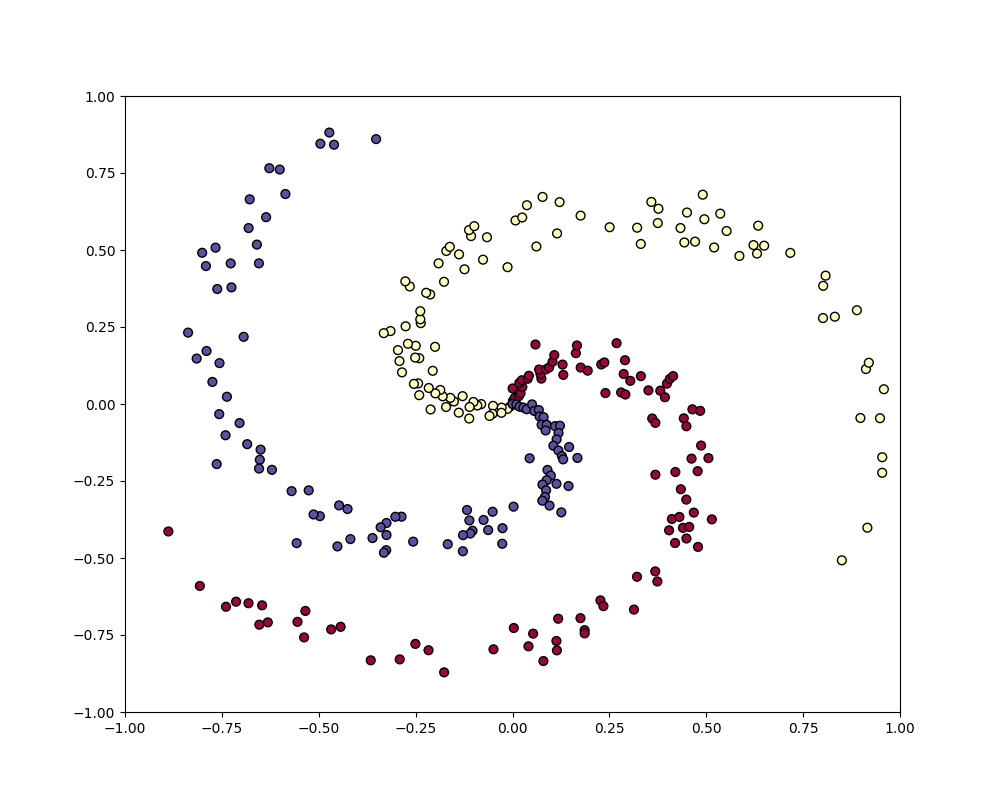

In [10]:
# create dataset
np.random.seed(0)
N = 100 # number of points per class
D = 2   # dimensionality
K = 3   # number of classes
X = np.zeros((N*K, D))
y = np.zeros(N*K, dtype='uint8')

for j in range(K):
    ix = range(N*j, N*(j+1))
    r  = np.linspace(0.0, 1, N)  # radius
    t  = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
    
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolor="k")
plt.xlim([-1, 1])
plt.ylim([-1, 1]);

## karpathy

In [34]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.100624
iteration 10: loss 0.918448
iteration 20: loss 0.851978
iteration 30: loss 0.822560
iteration 40: loss 0.807703
iteration 50: loss 0.799514
iteration 60: loss 0.794720
iteration 70: loss 0.791788
iteration 80: loss 0.789936
iteration 90: loss 0.788736
iteration 100: loss 0.787944
iteration 110: loss 0.787413
iteration 120: loss 0.787052
iteration 130: loss 0.786805
iteration 140: loss 0.786634
iteration 150: loss 0.786515
iteration 160: loss 0.786432
iteration 170: loss 0.786373
iteration 180: loss 0.786332
iteration 190: loss 0.786302


In [35]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.49


<IPython.core.display.Javascript object>


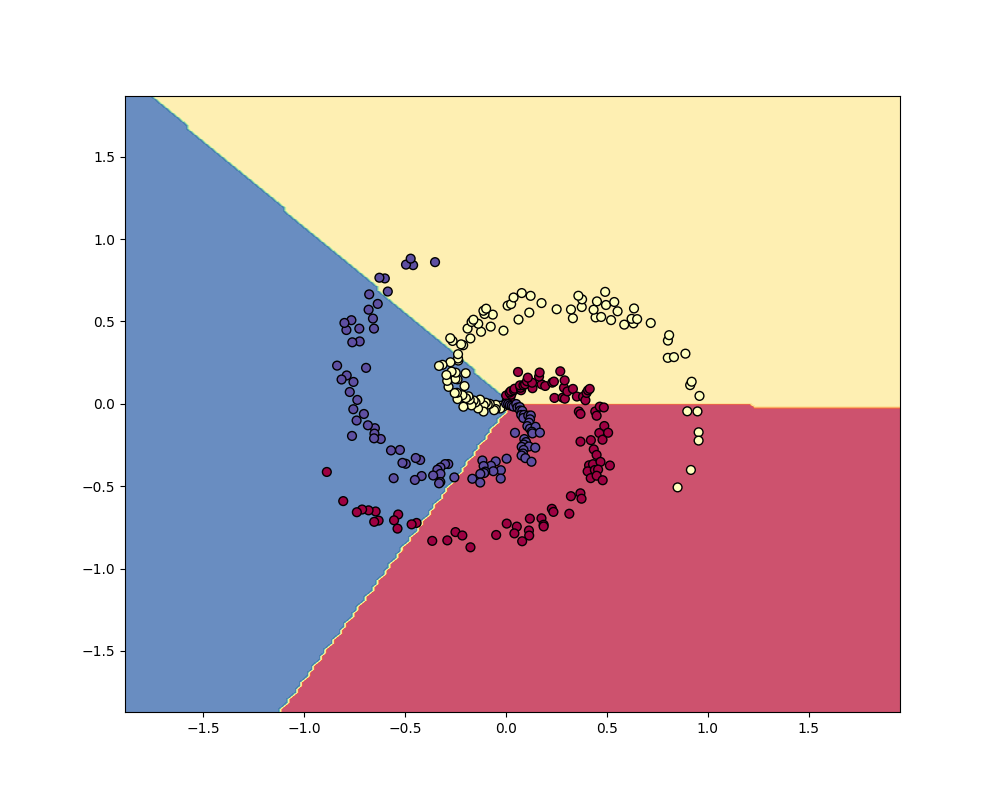

In [40]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max());
#fig.savefig('spiral_linear.png')

## scikit learn

In [12]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>


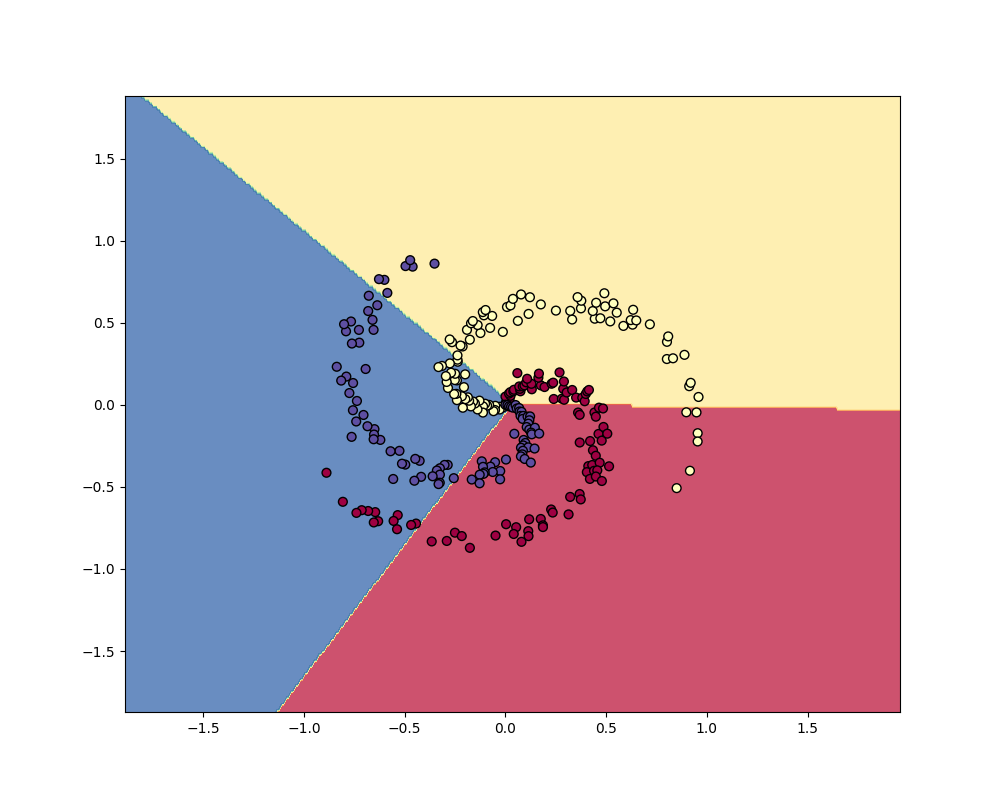

(-1.8712034092398278, 1.881219991658897)

In [25]:
# create input data
x0min, x0max = X[:, 0].min()-1, X[:, 0].max()+1
x1min, x1max = X[:, 1].min()-1, X[:, 1].max()+1

x0, x1 = np.meshgrid(
            np.linspace(x0min, x0max, 500).reshape(-1, 1),
            np.linspace(x1min, x1max, 200).reshape(-1, 1),
    )

Z = np.c_[x0.ravel(), x1.ravel()]

# predict
y_proba = softmax_reg.predict_proba(Z)
y_predict = softmax_reg.predict(Z)

# plot decision boundaries
zz = y_predict.reshape(x0.shape)

fig = plt.figure()
plt.contourf(x0, x1, zz, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolor="k")
plt.xlim(x0.min(), x0.max())
plt.ylim(x1.min(), x1.max());

In [16]:

y_predict.shape

(100000,)

In [18]:
y_proba


array([[7.72311073e-02, 2.60141236e-06, 9.22766291e-01],
       [7.90615992e-02, 2.66512274e-06, 9.20935736e-01],
       [8.09316713e-02, 2.73026506e-06, 9.19065598e-01],
       ...,
       [3.43094780e-05, 9.99962758e-01, 2.93294480e-06],
       [3.42830516e-05, 9.99962860e-01, 2.85715316e-06],
       [3.42566455e-05, 9.99962960e-01, 2.78332009e-06]])

In [27]:
softmax_reg.classes_

array([0, 1, 2], dtype=uint8)

In [28]:
softmax_reg.coef_

array([[ 1.06549733, -2.47703759],
       [ 1.16546976,  2.90496416],
       [-2.23096709, -0.42792657]])

In [30]:
softmax_reg.intercept_

array([-0.01727087, -0.05619333,  0.0734642 ])

## compare weights and biases

<IPython.core.display.Javascript object>


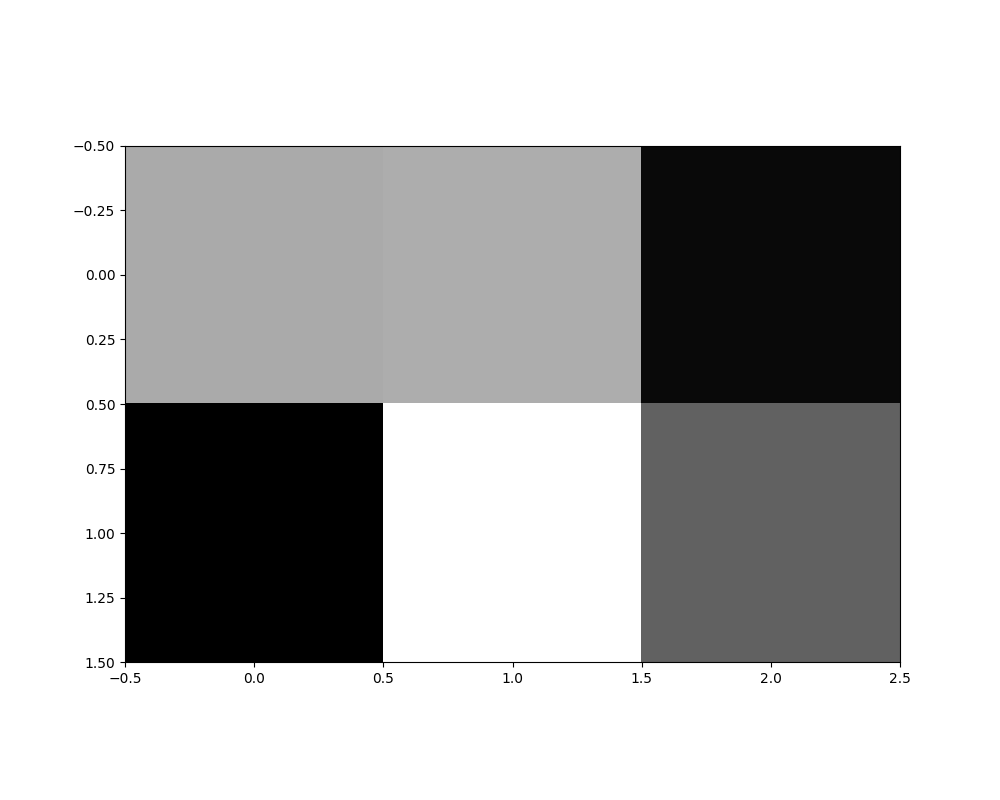

<IPython.core.display.Javascript object>


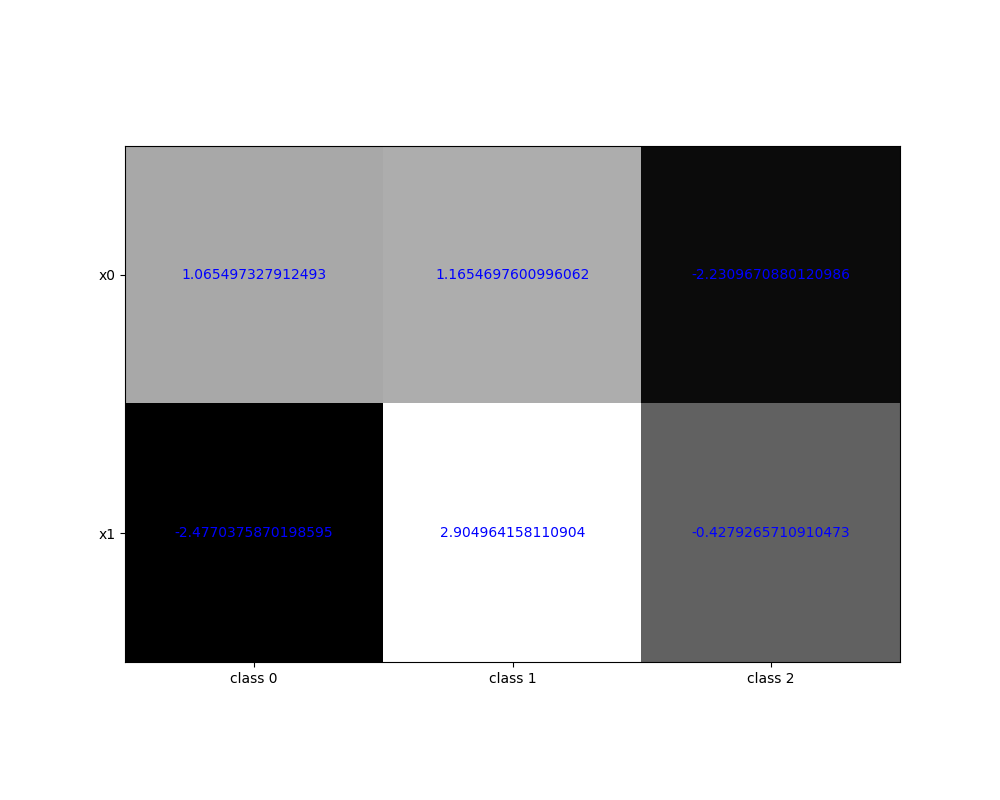

In [57]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

xlabels = ['class 0', 'class 1', 'class 2']
ylabels = ['x0', 'x1']

fig, ax = plt.subplots()
im = ax.imshow(W)

fig, ax = plt.subplots()
im = ax.imshow(softmax_reg.coef_.T, cmap='gray')

# We want to show all ticks...
ax.set_xticks(np.arange(len(xlabels)))
ax.set_yticks(np.arange(len(ylabels)))
# ... and label them with the respective list entries
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)

# Rotate the tick labels and set their alignment.
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#         rotation_mode="anchor")


# Loop over data dimensions and create text annotations.
matrix = softmax_reg.coef_.T
for i in range(len(ylabels)):
    for j in range(len(xlabels)):
        text = ax.text(j, i, matrix[i, j],
                       ha="center", va="center", color="b")

In [111]:
def heatmap(matrix, bias):
    
    WB = np.vstack((matrix, bias))
    
    xlabels = ['class 0', 'class 1', 'class 2']
    ylabels = ['x0', 'x1', 'b']

    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(WB, cmap='gray')

    ax.set_xticks(np.arange(len(xlabels)))
    ax.set_yticks(np.arange(len(ylabels)))
    ax.set_xticklabels(xlabels)
    ax.set_yticklabels(ylabels)

    for i in range(len(ylabels)):
        for j in range(len(xlabels)):
            val = "%.4f" % WB[i, j]   # weights + bias
            text = ax.text(j, i, val,
                           ha="center", va="center", color="#365CB7")
            
            bbox_props = dict(boxstyle="round", fc="w", ec="0.8", alpha=0.9, lw=1)
            ax.text(j, i, val, ha="center", va="center", size=10,
                bbox=bbox_props)

<IPython.core.display.Javascript object>


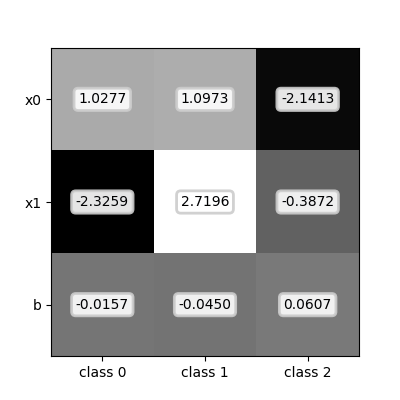

In [110]:
heatmap(W, b)

<IPython.core.display.Javascript object>


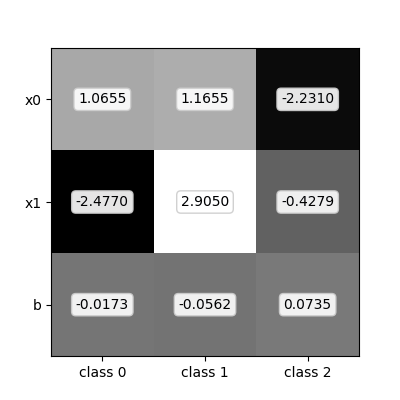

In [112]:
heatmap(softmax_reg.coef_.T, softmax_reg.intercept_.reshape((1, K)))

In [66]:
b.shape

(1, 3)

In [67]:
np.vstack((W, b))

array([[ 1.02767124,  1.09731992, -2.14125938],
       [-2.32594783,  2.71959216, -0.38722229],
       [-0.01571131, -0.04497533,  0.06068663]])

In [68]:
softmax_reg.coef_.shape

(3, 2)

In [74]:
softmax_reg.intercept_.reshape((1, 3)).shape

(1, 3)

<IPython.core.display.Javascript object>


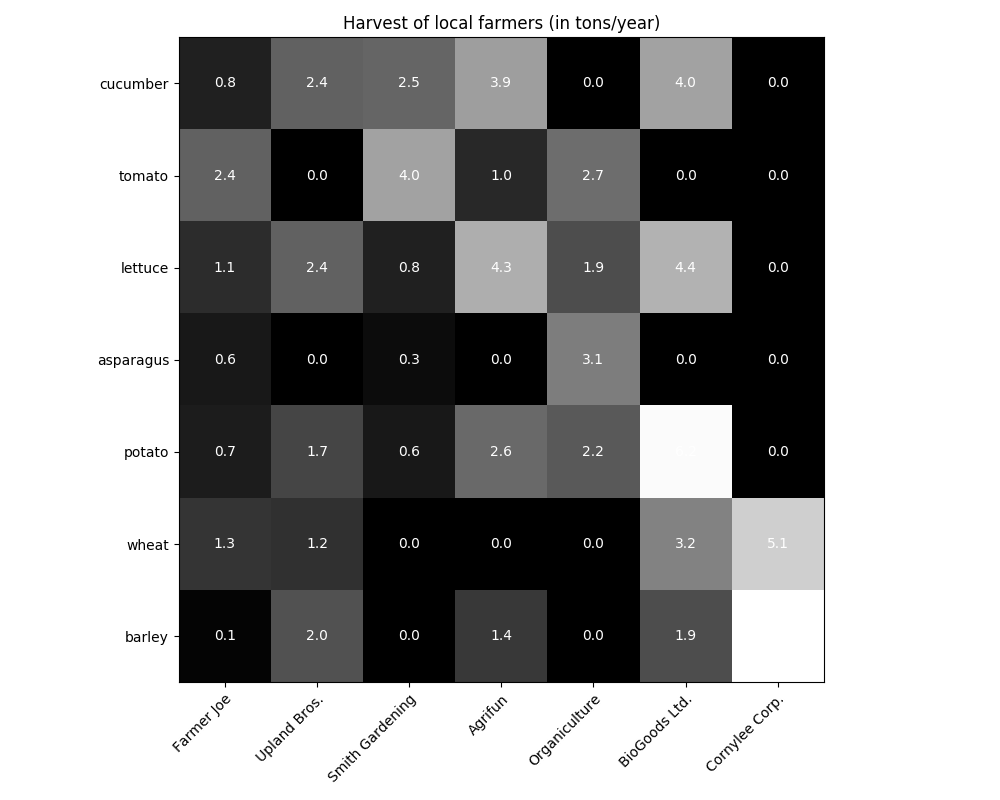

In [41]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()